In [ ]:
data_set = "dataset/SMILEsmileD/SMILEs"
output = "output"
# initialize the list of data and labels
data = []
labels = []

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from pipeline.nn.conv import LeNet
from imutils import paths
from matplotlib import pyplot
import imutils 
import numpy as np
import argparse
import cv2
import os

In [ ]:
# loop over the input images
for imagePath in sorted(list(paths.list_images(data_set))):
    # load the image, pre-process it, and store it in the data list
    #print(imagePath)
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = imutils.resize(image, width=32)
    image = cv2.resize(image, (32,32), interpolation=cv2.INTER_AREA)
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the label list
    label = imagePath.split(os.path.sep)[-3]
    label = "smiling" if label == "positives" else "not_smiling"
    labels.append(label)

count = 0
count_neg = 0
for i in range(len(labels)):
    if labels[i] == "smiling":
        count += 1
    else:
        count_neg += 1

print(count)
print(count_neg)

6500
6500


In [ ]:
len(labels)
#labels

13000

In [ ]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
labels

array(['not_smiling', 'not_smiling', 'not_smiling', ..., 'smiling',
       'smiling', 'smiling'], dtype='<U11')

In [ ]:
# convert the labels from integers to vectors
le = LabelEncoder().fit(labels)
labels = to_categorical(le.transform(labels), 2)

# account for skew in the labeled data
classTotals = labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

In [ ]:
classTotals

array([6500., 6500.], dtype=float32)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [ ]:
print(len(trainX), len(trainY), len(testX), len(testY))

10400 10400 2600 2600


In [ ]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=32, height=32, depth=1, classes=2)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

[INFO] compiling model...


[INFO] training network...
Epoch 1/15
163/163 [==============================] - 4s 19ms/step - loss: 0.5732 - accuracy: 0.6897 - val_loss: 0.4749 - val_accuracy: 0.7746
Epoch 2/15
163/163 [==============================] - 3s 19ms/step - loss: 0.4376 - accuracy: 0.7968 - val_loss: 0.4208 - val_accuracy: 0.8096
Epoch 3/15
163/163 [==============================] - 3s 19ms/step - loss: 0.3931 - accuracy: 0.8251 - val_loss: 0.4046 - val_accuracy: 0.8127
Epoch 4/15
163/163 [==============================] - 3s 19ms/step - loss: 0.3579 - accuracy: 0.8438 - val_loss: 0.3587 - val_accuracy: 0.8415
Epoch 5/15
163/163 [==============================] - 3s 21ms/step - loss: 0.3311 - accuracy: 0.8567 - val_loss: 0.3335 - val_accuracy: 0.8527
Epoch 6/15
163/163 [==============================] - 4s 23ms/step - loss: 0.3082 - accuracy: 0.8685 - val_loss: 0.3335 - val_accuracy: 0.8538
Epoch 7/15
163/163 [==============================] - 4s 23ms/step - loss: 0.2838 - accuracy: 0.8814 - val_loss: 0.

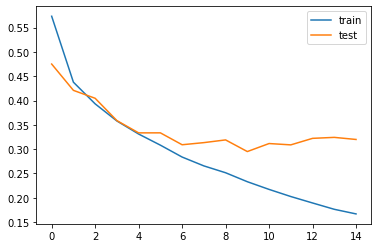

In [ ]:
# train the network
# Max Pooling
print("[INFO] training network...")
H = model.fit(trainX, trainY, batch_size=64, epochs=15, validation_data=(testX, testY), verbose=1)
pyplot.plot(H.history['loss'], label='train')
pyplot.plot(H.history['val_loss'], label='test')
#pyplot.plot(H.history['accuracy'], label='acc')
#pyplot.plot(H.history['val_accuracy'], label='pre')
pyplot.legend()
pyplot.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=le.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

 not_smiling       0.86      0.90      0.88      1300
     smiling       0.90      0.85      0.87      1300

    accuracy                           0.88      2600
   macro avg       0.88      0.88      0.88      2600
weighted avg       0.88      0.88      0.88      2600



[INFO] training network...
Epoch 1/15
163/163 [==============================] - 4s 20ms/step - loss: 0.5604 - accuracy: 0.6938 - val_loss: 0.4325 - val_accuracy: 0.8023
Epoch 2/15
163/163 [==============================] - 3s 19ms/step - loss: 0.4051 - accuracy: 0.8176 - val_loss: 0.3815 - val_accuracy: 0.8288
Epoch 3/15
163/163 [==============================] - 3s 19ms/step - loss: 0.3683 - accuracy: 0.8413 - val_loss: 0.3478 - val_accuracy: 0.8423
Epoch 4/15
163/163 [==============================] - 3s 19ms/step - loss: 0.3251 - accuracy: 0.8570 - val_loss: 0.3149 - val_accuracy: 0.8642
Epoch 5/15
163/163 [==============================] - 3s 20ms/step - loss: 0.2915 - accuracy: 0.8811 - val_loss: 0.3128 - val_accuracy: 0.8704
Epoch 6/15
163/163 [==============================] - 3s 20ms/step - loss: 0.2678 - accuracy: 0.8894 - val_loss: 0.2799 - val_accuracy: 0.8800
Epoch 7/15
163/163 [==============================] - 3s 20ms/step - loss: 0.2548 - accuracy: 0.8986 - val_loss: 0.

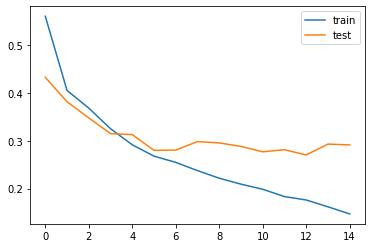

In [ ]:
# train the network
# Average Pooling
print("[INFO] training network...")
H = model.fit(trainX, trainY, batch_size=64, epochs=15, validation_data=(testX, testY), verbose=1)
pyplot.plot(H.history['loss'], label='train')
pyplot.plot(H.history['val_loss'], label='test')
#pyplot.plot(H.history['accuracy'], label='acc')
#pyplot.plot(H.history['val_accuracy'], label='pre')
pyplot.legend()
pyplot.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=le.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

 not_smiling       0.91      0.88      0.89      1300
     smiling       0.89      0.91      0.90      1300

    accuracy                           0.90      2600
   macro avg       0.90      0.90      0.90      2600
weighted avg       0.90      0.90      0.90      2600



In [ ]:
# save the model to disk
model.save(output)

INFO:tensorflow:Assets written to: output\assets
